In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

class_names = ['1','2','3']

In [2]:
os.getcwd()

'/home/castrogaray-j/U_Winnipeg_OneDrive/Digital_image_processing/BCIT_spectrogram'

In [3]:

df = pd.read_csv('paths_with_labels.csv')
df

,class,subject,label,drop 10,drop 20,event,path
0,1,18,0.0,0.0,0.0,165,/data/castrogaray-j/Spectrogram_images/subject...
1,1,14,0.0,NaN,NaN,160,/data/castrogaray-j/Spectrogram_images/subject...
2,3,17,0.0,NaN,NaN,143,/data/castrogaray-j/Spectrogram_images/subject...
3,3,17,0.0,0.0,0.0,147,/data/castrogaray-j/Spectrogram_images/subject...
4,1,14,0.0,0.0,NaN,85,/data/castrogaray-j/Spectrogram_images/subject...
...,...,...,...,...,...,...,...
586363,3,11,1.0,1.0,1.0,83,/data/castrogaray-j/Spectrogram_images/subject...
586364,2,1,1.0,1.0,1.0,107,/data/castrogaray-j/Spectrogram_images/subject...
586365,3,2,1.0,1.0,1.0,124,/data/castrogaray-j/Spectrogram_images/subject...
586366,1,18,1.0,1.0,1.0,6,/data/castrogaray-j/Spectrogram_images/subject...


In [7]:
df = df.drop(['class', 'subject', 'event', 'drop 10', 'drop 20'], axis=1)
df = df.dropna()
df



,label,path
0,0.0,/data/castrogaray-j/Spectrogram_images/subject...
1,0.0,/data/castrogaray-j/Spectrogram_images/subject...
2,0.0,/data/castrogaray-j/Spectrogram_images/subject...
3,0.0,/data/castrogaray-j/Spectrogram_images/subject...
4,0.0,/data/castrogaray-j/Spectrogram_images/subject...
...,...,...
586363,1.0,/data/castrogaray-j/Spectrogram_images/subject...
586364,1.0,/data/castrogaray-j/Spectrogram_images/subject...
586365,1.0,/data/castrogaray-j/Spectrogram_images/subject...
586366,1.0,/data/castrogaray-j/Spectrogram_images/subject...


In [ ]:
# random.seed(42)
# random_columns = random.sample(list(df.columns[:-1]), 48)
# df = df.drop(random_columns, axis=1)
# df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,drop 10
0,-1.694066e-21,0.000000e+00,3.388132e-21,3.388132e-21,1.694066e-21,1.694066e-21,1.694066e-21,6.776264e-21,0.000000e+00,-1.694066e-21,...,4.235165e-22,1.694066e-21,5.082198e-21,0.000000e+00,-1.694066e-21,-4.235165e-22,-2.117582e-22,6.352747e-22,8.470329e-22,0.0
1,1.367795e-06,7.358686e-07,-1.353265e-06,-6.660140e-07,-1.418271e-06,-1.178942e-06,-1.593172e-07,-3.007062e-06,-4.251445e-06,-1.889068e-06,...,-6.269747e-07,-4.213320e-07,-3.321927e-07,-7.462466e-07,1.323013e-07,-2.030122e-07,4.516313e-07,4.126750e-08,-4.690753e-07,0.0
2,2.634793e-06,1.389382e-06,-2.703374e-06,-1.340224e-06,-2.828713e-06,-2.380699e-06,-3.996504e-07,-5.959358e-06,-8.383633e-06,-3.750074e-06,...,-1.250383e-06,-8.611938e-07,-6.746280e-07,-1.484730e-06,2.469477e-07,-3.924289e-07,8.685733e-07,4.884356e-08,-9.347587e-07,0.0
3,3.711245e-06,1.887898e-06,-4.043501e-06,-2.027577e-06,-4.221111e-06,-3.622525e-06,-7.924837e-07,-8.801870e-06,-1.228179e-05,-5.553578e-06,...,-1.866034e-06,-1.336212e-06,-1.035964e-06,-2.207877e-06,3.277680e-07,-5.555591e-07,1.219779e-06,-7.522302e-09,-1.393258e-06,0.0
4,4.526850e-06,2.176970e-06,-5.361584e-06,-2.728561e-06,-5.582467e-06,-4.912392e-06,-1.391806e-06,-1.148114e-05,-1.584098e-05,-7.268717e-06,...,-2.469414e-06,-1.858618e-06,-1.421978e-06,-2.908816e-06,3.614210e-07,-6.815159e-07,1.480528e-06,-1.515572e-07,-1.840849e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46918597,-9.409061e-06,-3.141499e-06,-8.379883e-06,-5.933396e-06,-1.459741e-06,-2.178826e-06,-3.939842e-06,-3.359693e-06,-1.645382e-06,-3.918532e-06,...,-6.378253e-06,-2.533642e-07,-6.198654e-06,-4.374413e-06,-3.310236e-06,-4.477206e-07,9.129486e-07,1.500918e-06,4.291450e-06,1.0
46918598,-7.393714e-06,-2.586678e-06,-6.632058e-06,-4.628604e-06,-1.136006e-06,-1.726994e-06,-3.211942e-06,-2.710958e-06,-1.310361e-06,-3.075795e-06,...,-5.021141e-06,-2.779414e-07,-4.826026e-06,-3.390944e-06,-2.459670e-06,-2.911065e-07,7.111857e-07,1.058107e-06,3.180547e-06,1.0
46918599,-5.098529e-06,-1.840644e-06,-4.594245e-06,-3.174853e-06,-7.788930e-07,-1.198123e-06,-2.269999e-06,-1.902006e-06,-9.110509e-07,-2.118172e-06,...,-3.465457e-06,-2.294897e-07,-3.305557e-06,-2.316180e-06,-1.627789e-06,-1.728027e-07,4.863884e-07,6.706145e-07,2.100165e-06,1.0
46918600,-2.601830e-06,-9.564161e-07,-2.350518e-06,-1.614942e-06,-3.962490e-07,-6.136069e-07,-1.174845e-06,-9.801187e-07,-4.669436e-07,-1.079815e-06,...,-1.769152e-06,-1.284013e-07,-1.680103e-06,-1.175384e-06,-8.100845e-07,-8.007825e-08,2.468069e-07,3.243128e-07,1.043574e-06,1.0


In [ ]:
#df.iloc[:, :64].values.shape

(37449873, 64)

In [45]:
1024*4.0009765625 / 1
#int(1024*4 /16)
#46918602 / 1024

4097.0

Epoch 1/20, Loss: 0.9462
Epoch 3/20, Loss: 0.5426
Epoch 5/20, Loss: 0.6454
              precision    recall  f1-score   support

         0.0       0.59      0.99      0.74     50552
         1.0       0.53      0.01      0.03     35329

    accuracy                           0.59     85881
   macro avg       0.56      0.50      0.38     85881
weighted avg       0.57      0.59      0.45     85881

auc:0.5417347184358872 accuracy:0.5893154481200731
Params: {'epochs': 20, 'lr': 0.0001, 'model_name': 'vit_base_patch16_224', 'num_classes': 2, 'pretrained': True}, Validation Accuracy: 0.5893154481200731
Best Params: {'epochs': 20, 'lr': 0.0001, 'model_name': 'vit_base_patch16_224', 'num_classes': 2, 'pretrained': True}, Best Validation Accuracy: 0.5893154481200731
              precision    recall  f1-score   support

         0.0       0.59      0.99      0.74     50858
         1.0       0.56      0.01      0.03     35025

    accuracy                           0.59     85883
   macro av

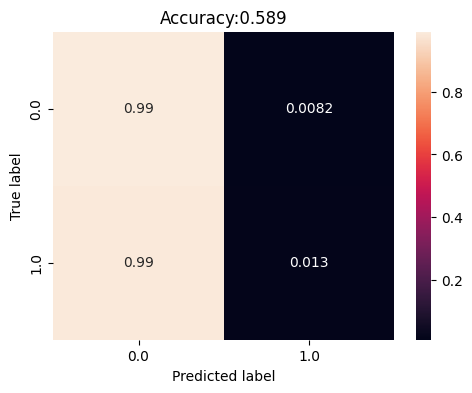

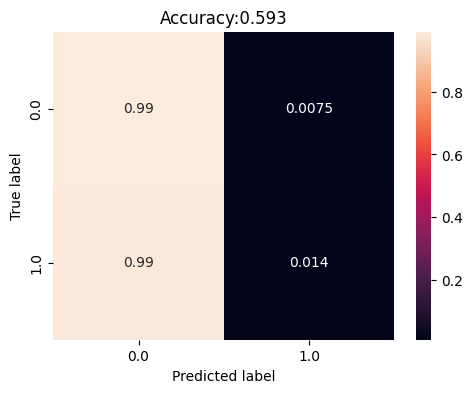

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
from torchvision import transforms
from PIL import Image
import timm
device = torch.device("cuda:1")

# Define a custom dataset class for EEG data
class EEGDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.iloc[idx]['label']

        if self.transform:
            image = self.transform(image)

        return image, label

# Vision Transformer-based EEG classifier
class EEGVisionTransformerClassifier(nn.Module):
    def __init__(self, num_classes, model_name='vit_base_patch16_224', pretrained=True):
        super(EEGVisionTransformerClassifier, self).__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained, num_classes=num_classes)

    def forward(self, x):
        return self.model(x)

# Data processing function
def preprocess_eeg_data(df):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    dataset = EEGDataset(df, transform=transform)
    return dataset

# Train, validation, and test split
def split_data(dataset, train_ratio=0.7, val_ratio=0.15):
    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = len(dataset) - train_size - val_size

    return random_split(dataset, [train_size, val_size, test_size])

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def classifier_assessment(y_test, predicted):
    confusion_mc = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    print(report)
    confusion_mc = confusion_mc / np.sum(confusion_mc, axis=1)[:, np.newaxis]
    classes = list(set(y_test))
    df_cm = pd.DataFrame(confusion_mc, index=classes, columns=classes)

    plt.figure(figsize=(5.5, 4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, predicted)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return report

def test_model(model, test_loader):
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            all_prob.extend(outputs[:, 1].cpu().numpy())
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    report = classifier_assessment(all_labels, all_preds)
    auc = roc_auc_score(all_labels, all_prob)
    accuracy_global = accuracy_score(all_labels, all_preds)

    print(f'auc:{auc} accuracy:{accuracy_global}')
    return accuracy_global, report

# Grid search for hyperparameter optimization
def grid_search(dataset, param_grid):
    best_params = None
    best_accuracy = 0

    train_data, val_data, test_data = split_data(dataset)

    train_loader = DataLoader(train_data, batch_size=24, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=24, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=24, shuffle=False)

    for params in ParameterGrid(param_grid):
        model = EEGVisionTransformerClassifier(
            num_classes=params['num_classes'],
            model_name=params['model_name'],
            pretrained=params['pretrained']
        )

        model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])

        loss_tmp = 1
        # Training loop
        for epoch in range(params['epochs']):
            model.train()
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels.long())
                loss.backward()
                optimizer.step()
            if epoch % 2 == 0:
                print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {loss.item():.4f}")
                if loss > loss_tmp + 0.1:
                    break
                loss_tmp = loss

        accuracy, report = test_model(model, val_loader)
        print(f"Params: {params}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model

    print(f"Best Params: {best_params}, Best Validation Accuracy: {best_accuracy}")
    test_model(best_model, test_loader)
    return best_params, best_model

# Preprocess data
dataset = preprocess_eeg_data(df)

# Define hyperparameter grid
param_grid = {
    'model_name': ['vit_base_patch16_224'],
    'pretrained': [True],
    'num_classes': [2],
    'lr': [0.0001],
    'epochs': [20]
}

# Perform grid search
best_params, best_model = grid_search(dataset, param_grid)

Epoch 1/20, Loss: 0.8203
Epoch 3/20, Loss: 0.7068
Epoch 5/20, Loss: 0.3212
Epoch 7/20, Loss: 0.7823
Epoch 9/20, Loss: 0.3042
Epoch 11/20, Loss: 0.3610
Epoch 13/20, Loss: 0.4437
Epoch 15/20, Loss: 0.1546
Epoch 17/20, Loss: 0.1973
Epoch 19/20, Loss: 0.0416
auc:0.770797682654138 accuracy:0.7143052454085586
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 20, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.7143052454085586
Best Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 20, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Best Validation Accuracy: 0.7143052454085586
auc:0.7615781880626734 accuracy:0.7061611374407583


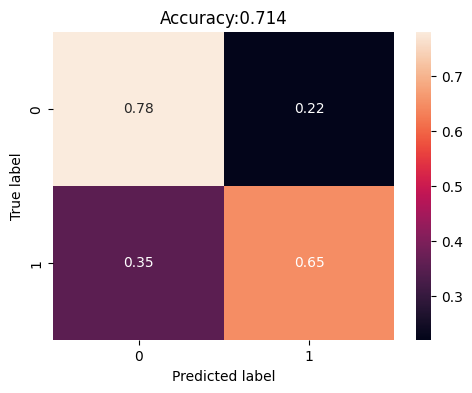

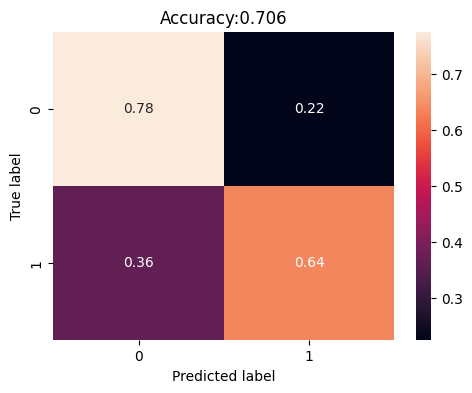

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
device = torch.device("cuda:1")
# Define a custom dataset class for EEG data
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Transformer-based EEG classifier
class EEGTransformerClassifier(nn.Module):
    def __init__(self, num_channels, seq_len, num_classes, d_model=128, nhead=8, num_layers=4, dropout=0.1):
        super(EEGTransformerClassifier, self).__init__()

        self.embedding = nn.Linear(num_channels, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_len, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(d_model, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, num_channels)
        x = self.embedding(x)  # Shape: (batch_size, seq_len, d_model)
        x = x + self.positional_encoding
        x = x.permute(1, 0, 2)  # Shape: (seq_len, batch_size, d_model)
        x = self.transformer_encoder(x)  # Shape: (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # Shape: (batch_size, d_model)
        x = self.classifier(x)  # Shape: (batch_size, num_classes)
        return x

# Data processing function
def preprocess_eeg_data(file_path, seq_len=256):
    

    # Extract labels and channels
    labels = df.iloc[:, -1].values.astype('int32') - 1  # Last column is the label
    channels = df.iloc[:, :-1].values  # First 64 columns are channels

    # Normalize the channel data (z-score normalization)
    channels = (channels - np.mean(channels, axis=0)) / np.std(channels, axis=0)

    # Reshape into windows
    num_samples = channels.shape[0] // seq_len
    truncated_len = num_samples * seq_len

    channels = channels[:truncated_len].reshape(num_samples, seq_len, -1)
    labels = labels[:truncated_len:seq_len]  # Take one label per window

    # Convert to tensors
    data = torch.tensor(channels, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)

    return data, labels

# Train, validation, and test split
def split_data(dataset, train_ratio=0.7, val_ratio=0.15):
    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = int(val_ratio * len(dataset))

    return random_split(dataset, [train_size, val_size, test_size])

from sklearn.metrics import accuracy_score
def classifier_assessment(y_test, predicted):
    confusion_mc = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    print(report)
    #confusion_mc = confusion_mc.astype('float') / confusion_mc.sum(axis=1)[:, np.newaxis]
    confusion_mc = confusion_mc/ np.sum( confusion_mc, axis=1)[:,np.newaxis]
    classes = list(set(y_test))
    df_cm = pd.DataFrame(confusion_mc,
                         #index = [i for i in range(1,4)], columns = [i for i in range(1,4)])
                         index = classes, columns = classes)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                           predicted)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return report

def test_model(model, test_loader):
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = [ ]
    

    
    
    with torch.no_grad():
        for psd_batch, labels_batch in test_loader:
            psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
            outputs = model(psd_batch)
            all_prob.extend( outputs[:,1].cpu().numpy() )
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    report = classifier_assessment(all_labels,all_preds)
    auc = roc_auc_score(all_labels, all_prob )
    accuracy_global = accuracy_score(all_labels, all_preds )

    print(f'auc:{auc} accuracy:{accuracy_global}')
    
    accuracy = accuracy_score(all_labels, all_preds)
    #print(f"Accuracy: {accuracy:.4f}")
    return accuracy, report

# Grid search for hyperparameter optimization
def grid_search(data, labels, param_grid, seq_len, num_classes, num_channels):
    best_params = None
    best_accuracy = 0

    dataset = EEGDataset(data, labels)
    train_data, val_data, test_data = split_data(dataset)

    train_loader = DataLoader(train_data, batch_size=24, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=24, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=24, shuffle=False)

    for params in ParameterGrid(param_grid):
        model = EEGTransformerClassifier(
            num_channels=num_channels,
            seq_len=seq_len,
            num_classes=num_classes,
            d_model=params['d_model'],
            nhead=params['nhead'],
            num_layers=params['num_layers'],
            dropout=params['dropout']
        )

        model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])

        loss_tmp = 1
        # Training loop
        for epoch in range(params['epochs']):
            model.train()
            for batch_data, batch_labels in train_loader:
                batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
                optimizer.zero_grad()
                outputs = model(batch_data)
                loss = criterion(outputs, batch_labels)
                loss.backward()
                optimizer.step()
            if epoch % 2 == 0:
                print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {loss.item():.4f}")
                if loss > loss_tmp + 0.1:
                    break
                loss_tmp = loss

        
        accuracy, report = test_model(model, val_loader)
        print(f"Params: {params}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model

    print(f"Best Params: {best_params}, Best Validation Accuracy: {best_accuracy}")
    test_model(best_model, test_loader)
    return best_params, best_model


#seq_len = int(1024*5.0009765625 / 18)
seq_len = 256
num_classes = 2  

# Preprocess data
data, labels = preprocess_eeg_data(df, seq_len=seq_len)
labels[labels != 0] = 1
num_channels = data.shape[2]

# Define hyperparameter grid
'''param_grid = {
    'd_model': [64], # [128], #64
    'nhead': [4], # [ 8], # 2-4
    'num_layers': [1], #[ 4], #1
    'dropout': [0.1],
    'lr': [0.0001],#, 1e-5],
    'epochs': [20] # [10, 20, 30]
}'''

param_grid = {
    'd_model': [128],
    'nhead': [ 8],
    'num_layers': [ 4],
    'dropout': [0.1],
    'lr': [0.0001],
    'epochs': [ 20]
}

# Perform grid search
best_params, best_model = grid_search(data, labels, param_grid, seq_len, num_classes, num_channels)




Epoch 1/20, Loss: 0.6562
Epoch 3/20, Loss: 0.6665
Epoch 5/20, Loss: 0.7458
Epoch 7/20, Loss: 0.2857
Epoch 9/20, Loss: 0.4634
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     12379
           1       0.71      0.69      0.70     12318

    accuracy                           0.71     24697
   macro avg       0.71      0.71      0.71     24697
weighted avg       0.71      0.71      0.71     24697

auc:0.7775007387307153 accuracy:0.705591772280034
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 20, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.705591772280034
Best Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 20, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Best Validation Accuracy: 0.705591772280034
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     12317
           1       0.71      0.69      0.70     12382

    accuracy                           0.71     

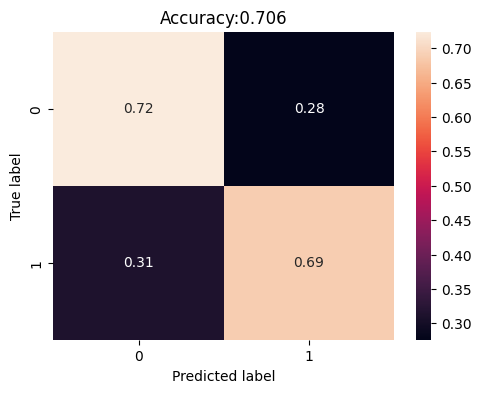

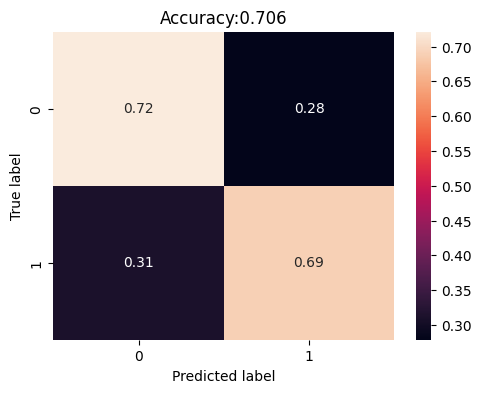

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
device = torch.device("cuda:0")
# Define a custom dataset class for EEG data
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        """
        data: Tensor of shape (num_samples, seq_len, num_channels)
        labels: Tensor of shape (num_samples,)
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Transformer-based EEG classifier
class EEGTransformerClassifier(nn.Module):
    def __init__(self, num_channels, seq_len, num_classes, d_model=128, nhead=8, num_layers=4, dropout=0.1):
        super(EEGTransformerClassifier, self).__init__()

        self.embedding = nn.Linear(num_channels, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_len, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(d_model, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, num_channels)
        x = self.embedding(x)  # Shape: (batch_size, seq_len, d_model)
        x = x + self.positional_encoding
        x = x.permute(1, 0, 2)  # Shape: (seq_len, batch_size, d_model)
        x = self.transformer_encoder(x)  # Shape: (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # Shape: (batch_size, d_model)
        x = self.classifier(x)  # Shape: (batch_size, num_classes)
        return x

# Data processing function
def preprocess_eeg_data(file_path, seq_len=256):
    """
    Preprocess the EEG data from a CSV file.
    
    Args:
        file_path: Path to the CSV file containing the data.
        seq_len: Length of each sequence (window size).

    Returns:
        data: Tensor of shape (num_samples, seq_len, num_channels)
        labels: Tensor of shape (num_samples,)
    """
    # Load data
    #df = pd.read_csv(file_path)

    # Extract labels and channels
    labels = df.iloc[:, -1].values.astype('int32') - 1  # Last column is the label
    channels = df.iloc[:, :-1].values  # First 64 columns are channels

    # Normalize the channel data (z-score normalization)
    channels = (channels - np.mean(channels, axis=0)) / np.std(channels, axis=0)

    # Reshape into windows
    num_samples = channels.shape[0] // seq_len
    truncated_len = num_samples * seq_len

    channels = channels[:truncated_len].reshape(num_samples, seq_len, -1)
    labels = labels[:truncated_len:seq_len]  # Take one label per window

    # Convert to tensors
    data = torch.tensor(channels, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)

    return data, labels

# Train, validation, and test split
def split_data(dataset, train_ratio=0.7, val_ratio=0.15):
    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = len(dataset) - train_size - val_size

    return random_split(dataset, [train_size, val_size, test_size])

from sklearn.metrics import accuracy_score
def classifier_assessment(y_test, predicted):
    confusion_mc = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    print(report)
    #confusion_mc = confusion_mc.astype('float') / confusion_mc.sum(axis=1)[:, np.newaxis]
    confusion_mc = confusion_mc/ np.sum( confusion_mc, axis=1)[:,np.newaxis]
    classes = list(set(y_test))
    df_cm = pd.DataFrame(confusion_mc,
                         #index = [i for i in range(1,4)], columns = [i for i in range(1,4)])
                         index = classes, columns = classes)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                           predicted)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return report

def test_model(model, test_loader):
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = [ ]
    
    #psd_test = X_test.reshape(X_test.shape[0], 64, 5)
    #test_dataset = EEGDataset(psd_test, y_test)
    #test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    
    with torch.no_grad():
        for psd_batch, labels_batch in test_loader:
            psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
            outputs = model(psd_batch)
            all_prob.extend( outputs[:,1].cpu().numpy() )
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    report = classifier_assessment(all_labels,all_preds)
    auc = roc_auc_score(all_labels, all_prob )
    accuracy_global = accuracy_score(all_labels, all_preds )

    print(f'auc:{auc} accuracy:{accuracy_global}')
    
    accuracy = accuracy_score(all_labels, all_preds)
    #print(f"Accuracy: {accuracy:.4f}")
    return accuracy, report

# Grid search for hyperparameter optimization
def grid_search(data, labels, param_grid, seq_len, num_classes, num_channels):
    best_params = None
    best_accuracy = 0

    dataset = EEGDataset(data, labels)
    train_data, val_data, test_data = split_data(dataset)

    train_loader = DataLoader(train_data, batch_size=24, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=24, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=24, shuffle=False)

    for params in ParameterGrid(param_grid):
        model = EEGTransformerClassifier(
            num_channels=num_channels,
            seq_len=seq_len,
            num_classes=num_classes,
            d_model=params['d_model'],
            nhead=params['nhead'],
            num_layers=params['num_layers'],
            dropout=params['dropout']
        )
        #device = torch.device("cuda:0")
        #model= nn.DataParallel(model, device_ids=[0,1,2])
        model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])
        loss_tmp = 1
        # Training loop
        for epoch in range(params['epochs']):
            model.train()
            for batch_data, batch_labels in train_loader:
                batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
                optimizer.zero_grad()
                outputs = model(batch_data)
                loss = criterion(outputs, batch_labels)
                loss.backward()
                optimizer.step()
            if epoch % 2 == 0:
                print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {loss.item():.4f}")
                if loss > loss_tmp + 0.1:
                    break
                loss_tmp = loss

        '''# Validation loop
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_data, batch_labels in val_loader:
                batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
                outputs = model(batch_data)
                _, predicted = torch.max(outputs, 1)
                total += batch_labels.size(0)
                correct += (predicted == batch_labels).sum().item()

        accuracy = correct / total'''
        accuracy, report = test_model(model, val_loader)
        print(f"Params: {params}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model

    print(f"Best Params: {best_params}, Best Validation Accuracy: {best_accuracy}")
    test_model(best_model, test_loader)
    return best_params, best_model


#seq_len = int(1024*5.0009765625 / 18)
seq_len = 256
num_classes = 2  

# Preprocess data
data, labels = preprocess_eeg_data(df, seq_len=seq_len)
labels[labels != 0] = 1
num_channels = data.shape[2]

# Define hyperparameter grid
'''param_grid = {
    'd_model': [64], # [128], #64
    'nhead': [4], # [ 8], # 2-4
    'num_layers': [1], #[ 4], #1
    'dropout': [0.1],
    'lr': [0.0001],#, 1e-5],
    'epochs': [20] # [10, 20, 30]
}'''

param_grid = {
    'd_model': [128],
    'nhead': [ 8],
    'num_layers': [ 4],
    'dropout': [0.1],
    'lr': [0.0001],
    'epochs': [ 20]
}

# Perform grid search
best_params, best_model = grid_search(data, labels, param_grid, seq_len, num_classes, num_channels)




In [ ]:
def test_model(model, test_loader):
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = [ ]
    
    #psd_test = X_test.reshape(X_test.shape[0], 64, 5)
    #test_dataset = EEGDataset(psd_test, y_test)
    #test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    
    with torch.no_grad():
        for psd_batch, labels_batch in test_loader:
            psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
            outputs = model(psd_batch)
            all_prob.extend( outputs[:,1].cpu().numpy() )
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    report = classifier_assessment(all_labels,all_preds)
    auc = roc_auc_score(all_labels, all_prob )
    accuracy_global = accuracy_score(all_labels, all_preds )

    print(f'auc:{auc} accuracy:{accuracy_global}')
    
    accuracy = accuracy_score(all_labels, all_preds)
    #print(f"Accuracy: {accuracy:.4f}")
    return accuracy, report

dataset = EEGDataset(data, labels)
train_data, val_data, test_data = split_data(dataset)
test_loader = DataLoader(test_data, batch_size=24, shuffle=False)
test_model(best_model, test_loader)

In [ ]:
# Extract labels and channels
labels = df.iloc[:, -2].values.astype('int32') - 1  # Last column is the label
channels = df.iloc[:, :-2].values  # First 64 columns are channels
seq_len = int(1024*5.0009765625)
num_samples = channels.shape[0] // seq_len
truncated_len = num_samples * seq_len
channels[:truncated_len].reshape(num_samples, seq_len, -1).shape

In [ ]:
test = df.values[:,:-2].reshape(-1, int(1024*5.0009765625)  , 64) == channels[:truncated_len].reshape(num_samples, seq_len, -1)
np.all(test)

In [ ]:
labels_2  = labels.reshape(-1, int(1024*5.0009765625) )
labels_2 = labels_2[:, 0]
labels_2.shape 

In [ ]:
labels_1 = labels[:truncated_len:seq_len]
np.all(labels_1 == labels_2)

In [ ]:
int(1024*5.0009765625)

In [ ]:
Best Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 30, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Best Validation Accuracy: 0.7998337719905804

In [ ]:
from sklearn.metrics import accuracy_score
#model = best_model
model.eval()
all_preds = []
all_labels = []

psd_test = X_test.reshape(X_test.shape[0], 64, 5)
test_dataset = EEGDataset(psd_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


with torch.no_grad():
    for psd_batch, labels_batch in test_loader:
        psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
        outputs = model(psd_batch)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels_batch.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.32774622523895275
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.6890150990441889
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.6830585953733204
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.6818465161379692
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.6948330793738745
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.5236874913422912
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.49515168305859536
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7536016068707577
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.7431777254467378
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.7425890012467101
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.7477143648704807
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.6569123147250312
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.6675439811608256
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.6562889596897077
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.6568776838897354
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.33165950962737223
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7297063305166921
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.7280094195872004
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.7406496744701482
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.7239922426928938
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.33165950962737223
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7337235074109988